# Brexit Divorce Bill Vizualization

Vizualizing the cost of the UK's divorce bill from the EU with other large costs

In [739]:
import random
import math
import sys
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import pandas as pd

In [740]:
#!python -m pip install colorcet
#!python -m pip install holoviews

In [741]:
import colorcet as cc
import holoviews as hv

In [742]:
print(dir(cc)) # show all colormaps in colorcet module

['LinearSegmentedColormap', 'OrderedDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'b_cyclic_grey_15_85_c0', 'b_cyclic_grey_15_85_c0_s25', 'b_cyclic_mrybm_35_75_c68', 'b_cyclic_mrybm_35_75_c68_s25', 'b_cyclic_mygbm_30_95_c78', 'b_cyclic_mygbm_30_95_c78_s25', 'b_cyclic_wrwbw_40_90_c42', 'b_cyclic_wrwbw_40_90_c42_s25', 'b_diverging_bkr_55_10_c35', 'b_diverging_bky_60_10_c30', 'b_diverging_bwr_40_95_c42', 'b_diverging_bwr_55_98_c37', 'b_diverging_cwm_80_100_c22', 'b_diverging_gkr_60_10_c40', 'b_diverging_gwr_55_95_c38', 'b_diverging_gwv_55_95_c39', 'b_diverging_isoluminant_cjm_75_c23', 'b_diverging_isoluminant_cjm_75_c24', 'b_diverging_isoluminant_cjo_70_c25', 'b_diverging_linear_bjr_30_55_c53', 'b_diverging_linear_bjy_30_90_c45', 'b_diverging_rainbow_bgymr_45_85_c67', 'b_isoluminant_cgo_70_c39', 'b_isoluminant_cgo_80_c38', 'b_isoluminant_cm_70_c39', 'b_linear_bgy_10_95_c74', 'b_linear_bgyw_15_100

In [743]:
header_names = [0,1] # use first and second columns only
file = "c:\\Users\\prof\\Documents\\brexit.xlsx"
data = pd.read_excel(file, usecols=header_names)


In [744]:
data

,billions,label
0,22,UK Taxpayer loss from sale of Royal Bank of Sc...
1,27,UK Housing Benefit
2,28,Tourism
3,34,UK lottery: Good causes spend since 1994
4,42,UK Corporation Tax
5,46,UK Defence budget
6,49,NHS: Staff
7,40,"Brexit ""divorce"" bill"
8,56,UK High Speed Raillink (HS2)
9,66,UK Financial services: tax contribution


In [745]:
data = data.sort_values('billions',ascending=False)
brexit_bolean = data['label'] == 'Brexit "divorce" bill'

In [746]:
brexit_bolean # boolean map to find the location of Brexit in the data (in case the data changes)

14    False
13    False
12    False
11    False
10    False
9     False
8     False
6     False
5     False
4     False
7      True
3     False
2     False
1     False
0     False
Name: label, dtype: bool

In [747]:
colour_labels = []
brexit_loco = 0
i = 0
for test in brexit_bolean:
    if test ==True:
        colour_labels.append('r')
        brexit_loco = i
    else:
        colour_labels.append('b')
        i+=1
name_labels = ['NHS (annual)', 'Education budget', 'Student Debt', 'Creative industries', 'Budget deficit','Financial services industry', 'HS2', 'NHS Staff', 'Defence budget', 'Corporate Tax Receipts', 'Brexit Divorce Bill', 'Lottery good causes','UK Tourism Industry','Housing Benefits', 'RBS sale loss']
short_names = ['NHS', 'Education', 'Student', 'Creative', 'UK Deficit','Finance', 'HS2', 'NHS_staff', 'Defence', 'Tax Receipts', 'Brexit', 'Lottery','Tourism','Housing', 'RBS']

In [748]:
colour_labels

['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'b', 'b', 'b', 'b']

In [749]:
# data_no_brexit = data.drop(brexit_loco)
brexit = data[data['label']=='Brexit "divorce" bill']

In [750]:
brexit_loco

10

In [751]:
brexit['billions']

7    40
Name: billions, dtype: int64

In [752]:
sorted_data = sorted(data['billions'],reverse=True)
sorted_data

[106, 102, 100, 84, 70, 66, 56, 49, 46, 42, 40, 34, 28, 27, 22]

Create colour map for charts

In [753]:
minima = min(sorted_data)
maxima = max(sorted_data)

norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True) # normalize values for colour map
mapper = cm.ScalarMappable(norm=norm, cmap=cc.m_linear_blue_95_50_c20) # make grey to blue colour map


In [754]:
color_map = [mapper.to_rgba(v) for v in sorted_data]
color_map[brexit_loco] = (1,0,0,1) # set Brexit value to bold red
print(color_map)

[(0.22967000000000001, 0.48437000000000002, 0.6976, 1.0), (0.28061000000000003, 0.50422, 0.70647000000000004, 1.0), (0.30325000000000002, 0.51424000000000003, 0.71121999999999996, 1.0), (0.44923000000000002, 0.59867000000000004, 0.76227999999999996, 1.0), (0.53605000000000003, 0.67532999999999999, 0.83475999999999995, 1.0), (0.56230000000000002, 0.69742999999999999, 0.85418000000000005, 1.0), (0.63788999999999996, 0.75444999999999995, 0.89563000000000004, 1.0), (0.69821999999999995, 0.79266000000000003, 0.91178999999999999, 1.0), (0.72491000000000005, 0.80905000000000005, 0.91710000000000003, 1.0), (0.76375000000000004, 0.83277000000000001, 0.92366000000000004, 1.0), (1, 0, 0, 1), (0.83572000000000002, 0.87678999999999996, 0.93327000000000004, 1.0), (0.88961999999999997, 0.91005000000000003, 0.93891000000000002, 1.0), (0.89858000000000005, 0.91561000000000003, 0.93974000000000002, 1.0), (0.94333999999999996, 0.94352999999999998, 0.94347999999999999, 1.0)]


In [755]:
diverge_mapper = cm.ScalarMappable(norm=norm, cmap=cc.m_linear_gow_60_85_c27) # alternative diverging colour map
diverge_color_map = [diverge_mapper.to_rgba(v) for v in sorted_data]
diverge_color_map[brexit_loco] = (1,0,0,1) # set Brexit value to bold red

In [756]:
name_labels

['NHS (annual)',
 'Education budget',
 'Student Debt',
 'Creative industries',
 'Budget deficit',
 'Financial services industry',
 'HS2',
 'NHS Staff',
 'Defence budget',
 'Corporate Tax Receipts',
 'Brexit Divorce Bill',
 'Lottery good causes',
 'UK Tourism Industry',
 'Housing Benefits',
 'RBS sale loss']

In [757]:
name_labels
print(len(name_labels))

15


## Horizonatal Bar Charts

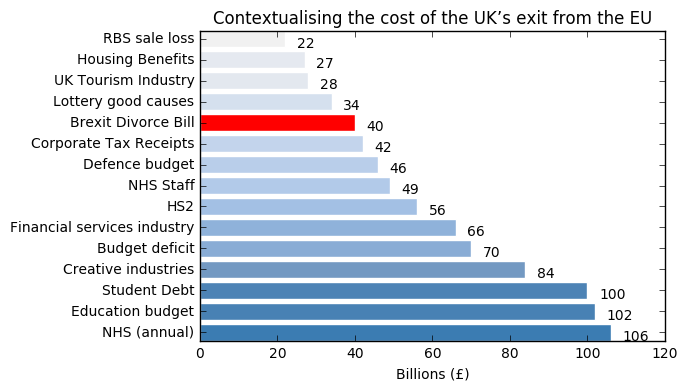

In [758]:
x = range(len(sorted_data))
y = sorted_data

plt.barh(x,y,color=color_map,tick_label=name_labels,edgecolor='w', align='center')
for i, v in enumerate(sorted_data):
    plt.text(v + 3, i-0.2, str(v), color='black',va="center")
plt.title('Contextualising the cost of the UK’s exit from the EU')
plt.xlabel('Billions (£)')
plt.margins(y=0) 
plt.savefig('barh.jpg', bbox_inches='tight')
plt.show()


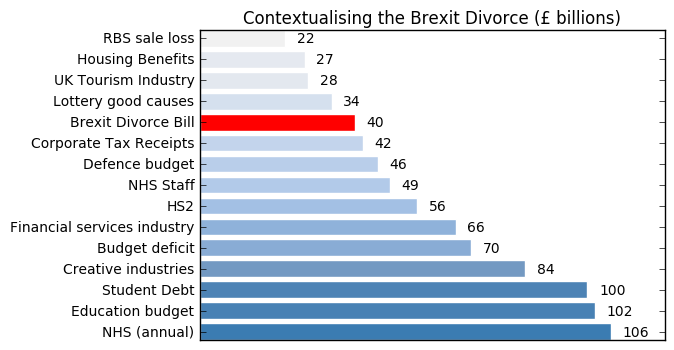

In [759]:
width = 0.8
fig,a = plt.subplots()
p1 = plt.barh(x,y,color=color_map, tick_label=name_labels,edgecolor='w', align='center')

a.xaxis.set_visible(False) # set x axis invisible

for i, v in enumerate(sorted_data):
    plt.text(v + 3, i, str(v), color='black',va="center") # add values to end of each bar
plt.title('Contextualising the Brexit Divorce (£ billions)')
plt.xlabel('Billions (£)')
plt.margins(y=0) 
plt.savefig('barh_no_x_ticks.jpg', bbox_inches='tight')
plt.show()



## Pie Charts

In [760]:
explode = [0 if x =='b' else 0.3 for x in colour_labels] # explode slice with Brexit values

In [761]:
explode

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0]

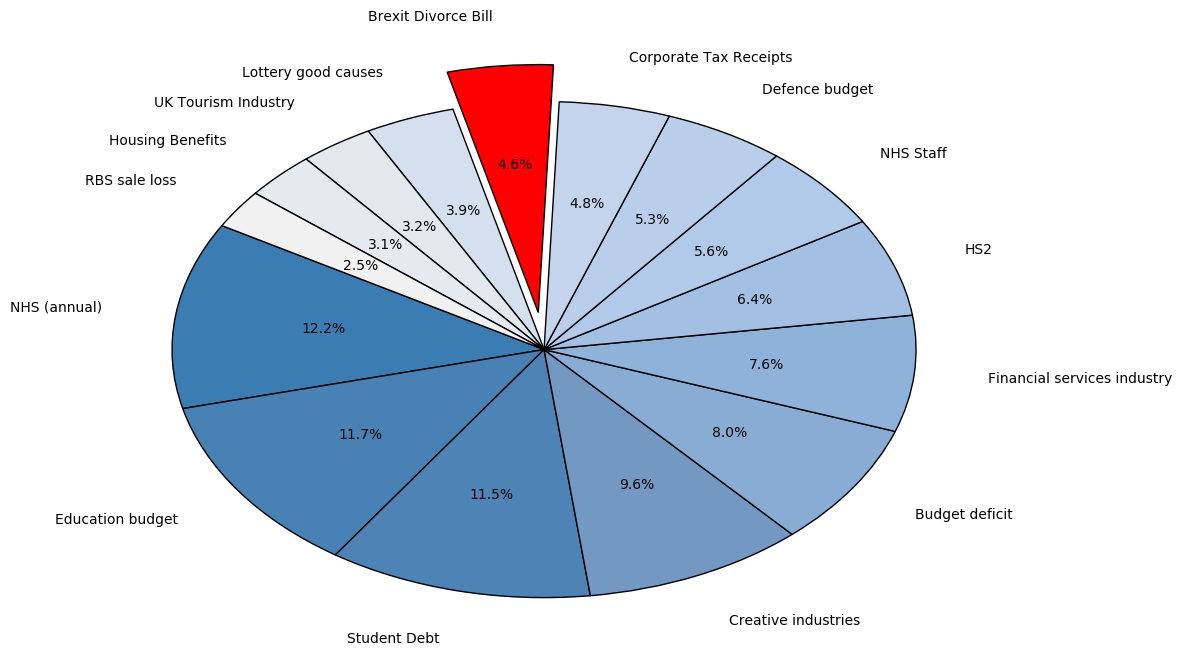

In [762]:
plt.pie(sorted_data,labels=name_labels,autopct='%1.1f%%', colors=color_map, radius=2, wedgeprops = {'linewidth': 1}, explode=explode,labeldistance=1.2,startangle=150)
# plt.set_title("Matplotlib bakery: A pie")
# plt.title('Contextualising the cost of the UK’s exit from the EU', loc='center')
plt.savefig('pie.png', bbox_inches='tight')
plt.show()


## Doughnut/donut pie chart

In [763]:
centre_circle = plt.Circle((0,0),0.70,fc='white')

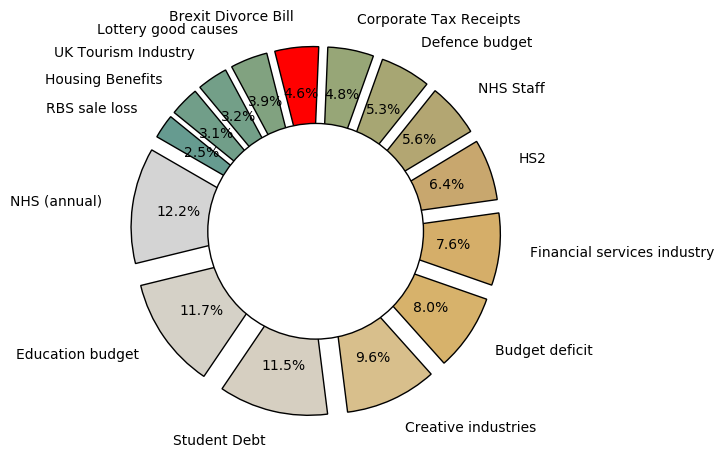

In [764]:
fig1, ax1 = plt.subplots()
explode_all = [0.2 for x in sorted_data]
ax1.pie(sorted_data, colors = diverge_color_map, labels=name_labels, explode=explode_all, autopct='%1.1f%%',pctdistance=0.7, labeldistance=1.2,startangle=150)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('donut.png', bbox_inches='tight')
plt.show()

## Bubble Charts

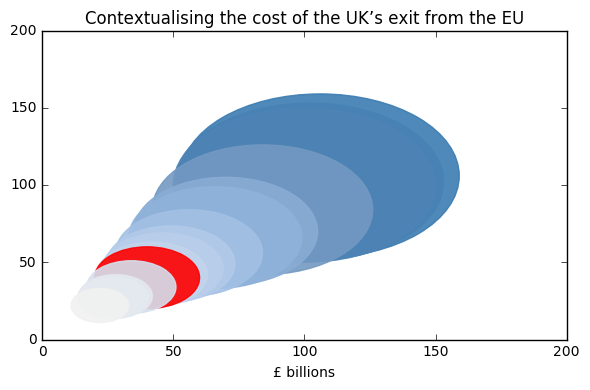

In [765]:
fig, ax = plt.subplots()
x= 0
y= 0

ax.set_xlim((0, 200))
ax.set_ylim((0, 200))
for i in range(len(sorted_data)):
    circle=plt.Circle((sorted_data[i],sorted_data[i]),sorted_data[i]/2,alpha=0.9, color=color_map[i])
    plt.gcf().gca().add_artist(circle)
    ax.set_label="x"
    x+=1
    y+=1
plt.title('Contextualising the cost of the UK’s exit from the EU')
plt.xlabel('£ billions')
plt.tight_layout()    
plt.show()



In [766]:
sorted_data.reverse()
color_map.reverse()

## Treemap Charts

In [767]:
#!python -m pip install squarify

In [768]:
import squarify 

In [769]:
sorted_data.reverse()
color_map.reverse()

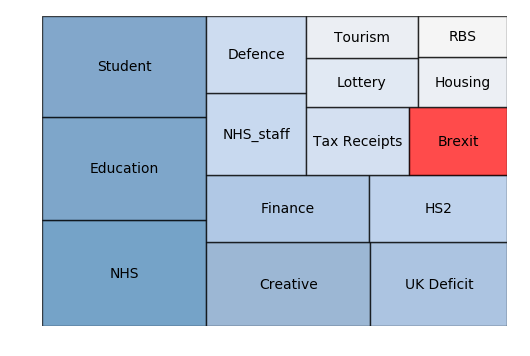

In [770]:

squarify.plot(sizes=sorted_data, label=short_names, alpha=.7,color=color_map )
plt.axis('off')
plt.savefig('squares.png', bbox_inches='tight')
plt.show() 

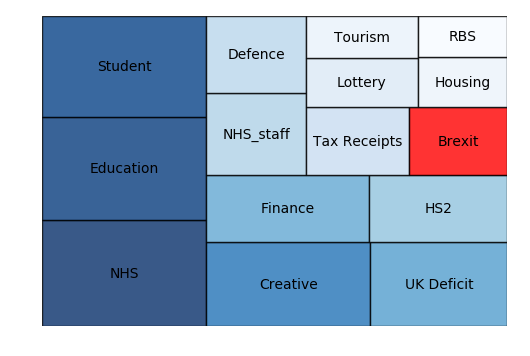

In [771]:
my_values = sorted_data

# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
# print(colors)
colors[brexit_loco] = (1,0,0,1) 


# Change color
squarify.plot(sizes=my_values, alpha=.8, color=colors, label=short_names )
plt.axis('off')
plt.show()

## Circle Packing

In [772]:
!python -m pip install circlify

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [773]:
import circlify as circ

In [774]:
sorted_data

[106, 102, 100, 84, 70, 66, 56, 49, 46, 42, 40, 34, 28, 27, 22]

In [775]:
# sorted_data.reverse()

In [776]:
reverse_data = sorted_data[::-1]

In [777]:
reverse_data

[22, 27, 28, 34, 40, 42, 46, 49, 56, 66, 70, 84, 100, 102, 106]

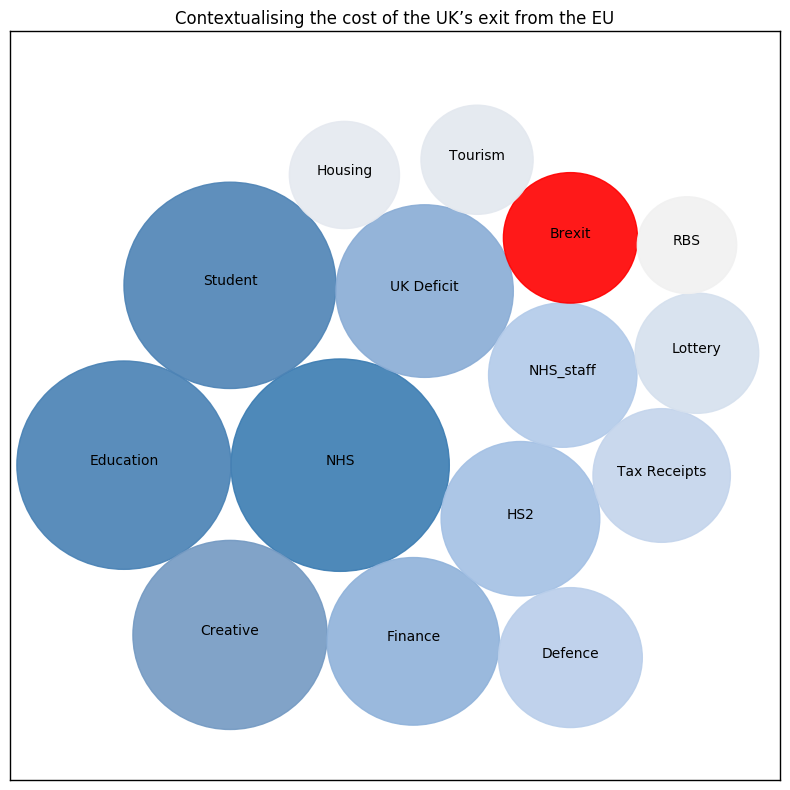

In [778]:
data = sorted_data
circles = circ.circlify(data, with_enclosure=False)

fig, ax = plt.subplots(figsize=(8.0, 8.0))
ax.set_xlim((-1, 1)) # set size of x axis
ax.set_ylim((-1, 1)) # set size of y axis

for i in range(len(circles)):
    x = circles[i][0] # take x value from 1st value in circles
    y = circles[i][1] # take y value from 2nd value in circles
    r = circles[i][2] # radius of circle
        
    circle=plt.Circle((x,y),r,alpha=0.9,color=color_map[i])
    plt.gca().add_artist(circle)
    ax.annotate(short_names[i], xy=(x, y), fontsize=10, ha="center")

ax.get_xaxis().set_visible(False)    
ax.get_yaxis().set_visible(False)  

plt.title('Contextualising the cost of the UK’s exit from the EU')
plt.tight_layout()

plt.savefig('circle_pack1.jpg')
plt.show()

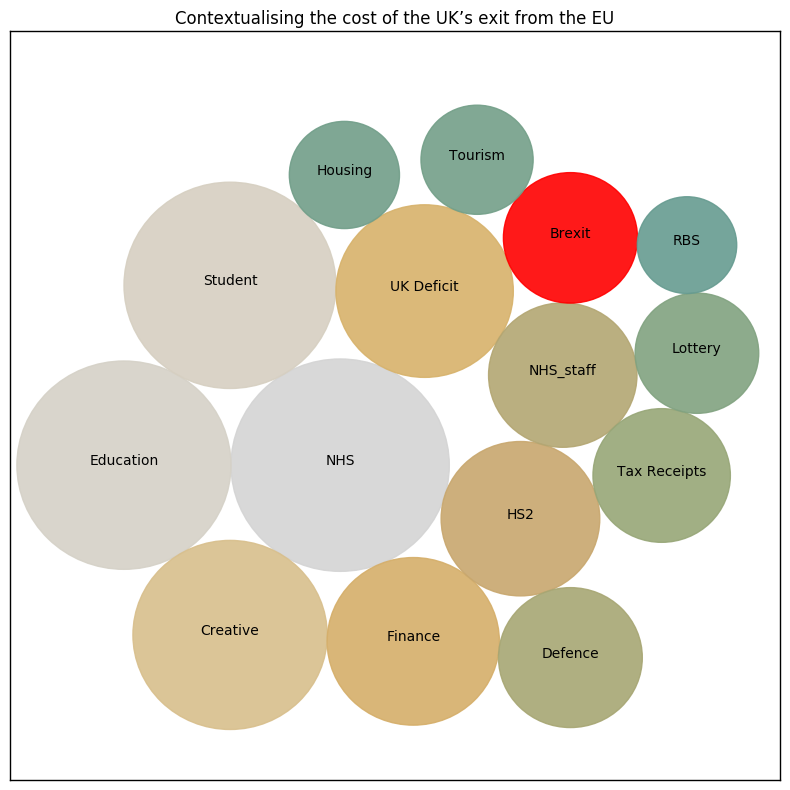

In [779]:
data = sorted_data
circles = circ.circlify(data, with_enclosure=False)

fig, ax = plt.subplots(figsize=(8.0, 8.0))
ax.set_xlim((-1, 1)) # set size of x axis
ax.set_ylim((-1, 1)) # set size of y axis

for i in range(len(circles)):
    x = circles[i][0] # take x value from 1st value in circles
    y = circles[i][1] # take y value from 2nd value in circles
    r = circles[i][2] # radius of circle
        
    circle=plt.Circle((x,y),r,alpha=0.9,color=diverge_color_map[i])
    plt.gca().add_artist(circle)
    ax.annotate(short_names[i], xy=(x, y), fontsize=10, ha="center")

ax.get_xaxis().set_visible(False)    
ax.get_yaxis().set_visible(False)  

plt.title('Contextualising the cost of the UK’s exit from the EU')
plt.tight_layout()

plt.savefig('circle_pack_diverse.jpg')
plt.show()

## Poly packing

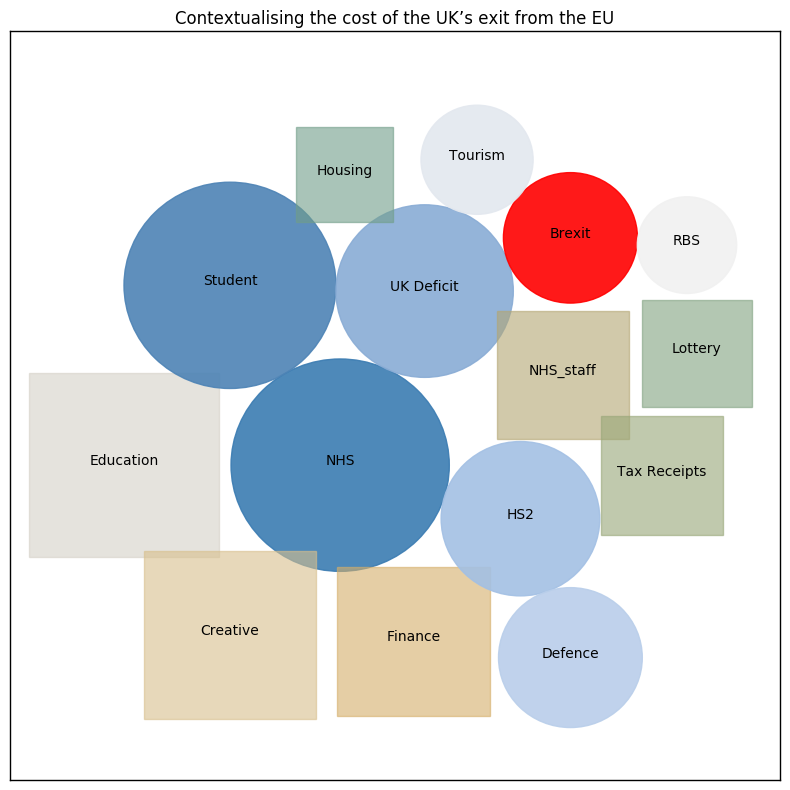

In [780]:
import math
data = sorted_data
circles = circ.circlify(data, with_enclosure=False)

fig, ax = plt.subplots(figsize=(8.0, 8.0))
ax.set_xlim((-1, 1)) # set size of x axis
ax.set_ylim((-1, 1)) # set size of y axis

for i in range(len(circles)):
      
    x = circles[i][0] # take x value from 1st value in circles
    y = circles[i][1] # take y value from 2nd value in circles
    r = circles[i][2] # radius of circle
    if i % 2 == 0:
            circle=plt.Circle((x,y),r,alpha=0.9,color=color_map[i])
            plt.gca().add_artist(circle)
            ax.annotate(short_names[i], xy=(x, y), fontsize=10, ha="center")
    else:
        s = (math.pi*(r**2)) ** (0.5)  # side of square if converting circle area to square
        xCenter = x - s/2 # rectangles drawn from x and y coordinates so need to adjust center
        yCenter = y - s/2
         
        
        rect = matplotlib.patches.Rectangle((xCenter,yCenter),s, s, color=diverge_color_map[i], alpha=0.6)
        plt.gca().add_artist(rect)
        ax.annotate(short_names[i], xy=(x, y), fontsize=10, ha="center")    

ax.get_xaxis().set_visible(False)    
ax.get_yaxis().set_visible(False)  
plt.title('Contextualising the cost of the UK’s exit from the EU')

plt.tight_layout()

plt.savefig('poly_pack2.jpg')
plt.show()

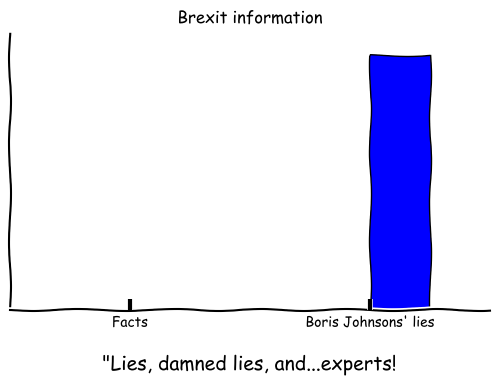

In [781]:
with plt.xkcd():
    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(["Facts", "Boris Johnsons' lies"])
    plt.yticks([])

    plt.title("Brexit information")

    fig.text(
        0.5, 0.05,
        '"Lies, damned lies, and...experts!',
        ha='center')
plt.savefig('lies.jpg')
plt.show()